In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [5]:

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.drop(['RowNumber','CustomerId','Surname','Tenure'],axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


<Axes: xlabel='Age', ylabel='Count'>

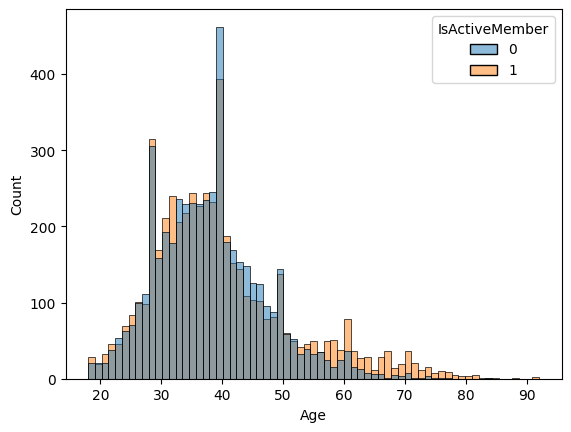

In [8]:
sns.histplot(data,x='Age',hue='IsActiveMember')

<Axes: xlabel='Geography', ylabel='count'>

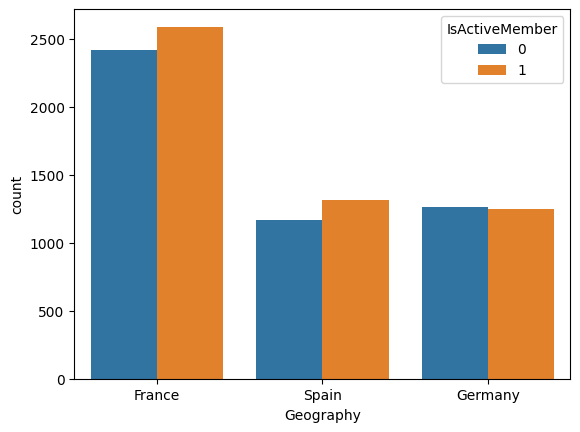

In [9]:
sns.countplot(data,x='Geography',hue='IsActiveMember')

In [10]:
#data.drop('Geography',axis=1,inplace=True)

<Axes: xlabel='Gender', ylabel='count'>

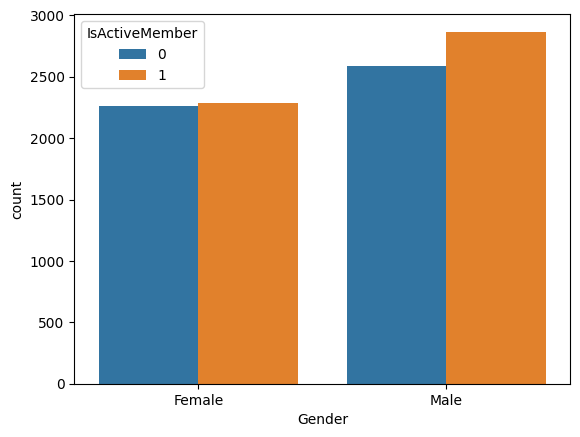

In [11]:
sns.countplot(data,x='Gender',hue='IsActiveMember')

In [12]:
#data=data.drop('Gender',axis=1)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0


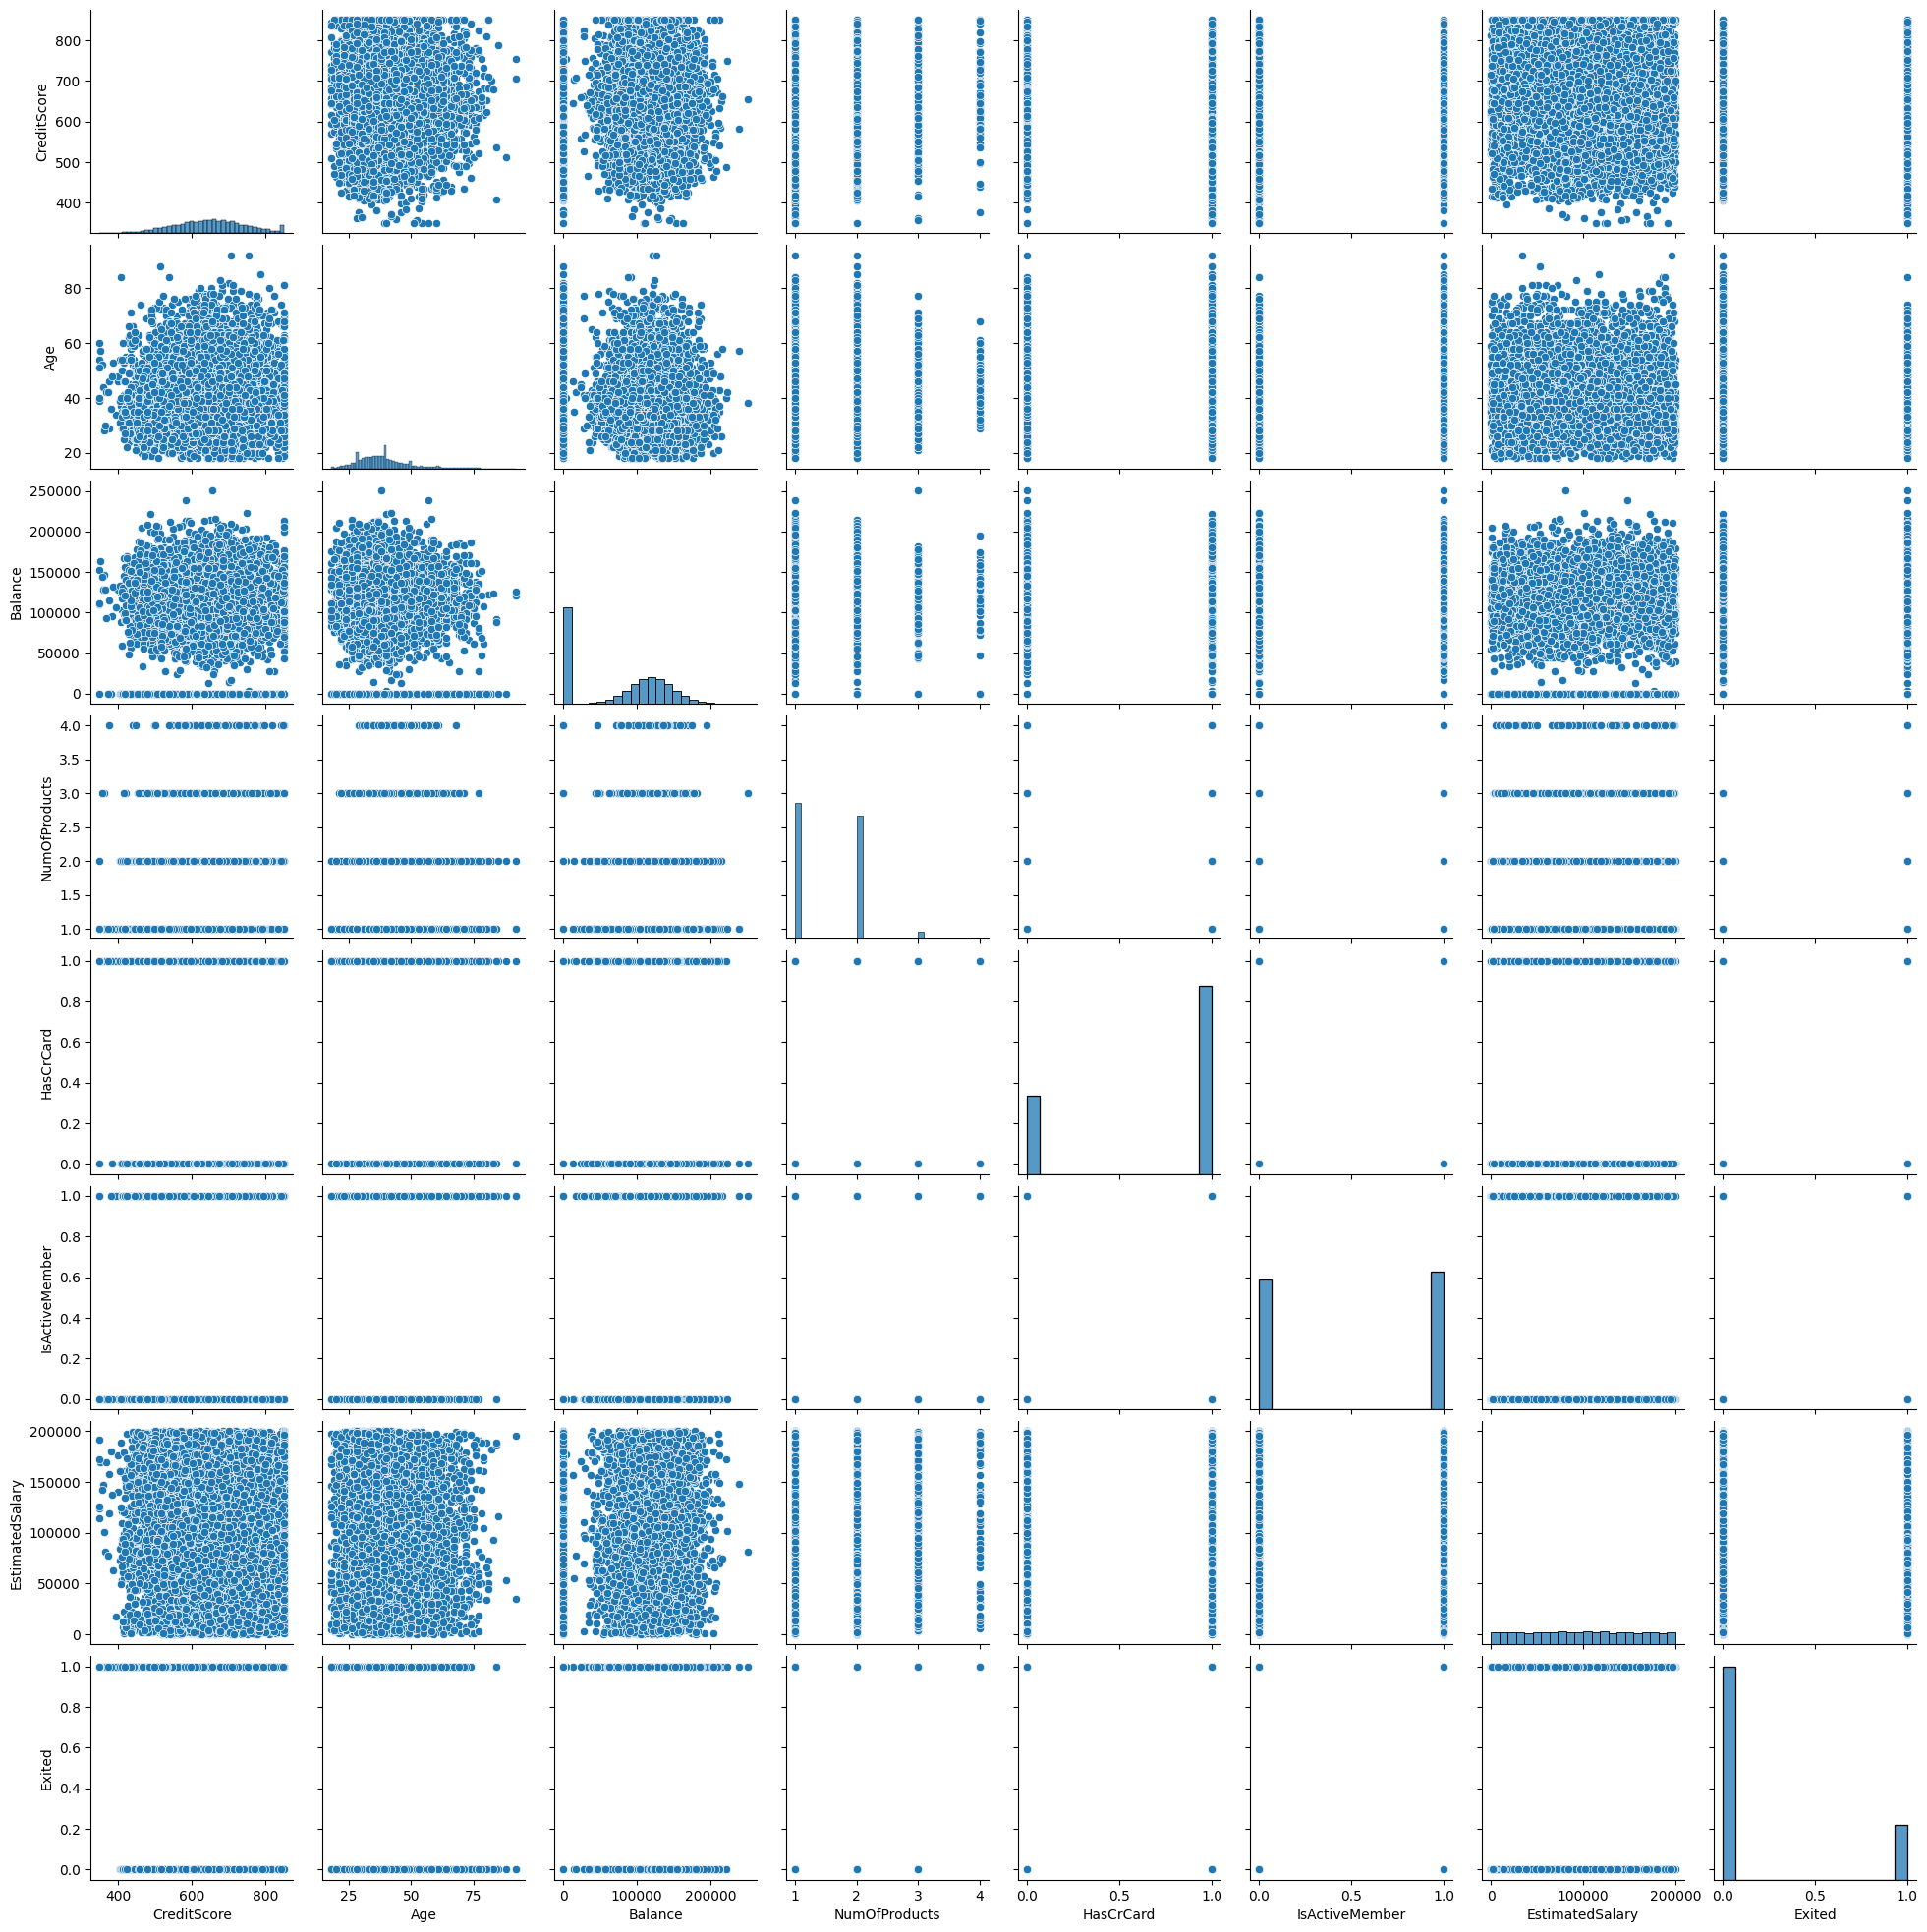

In [14]:
sns.pairplot(data)

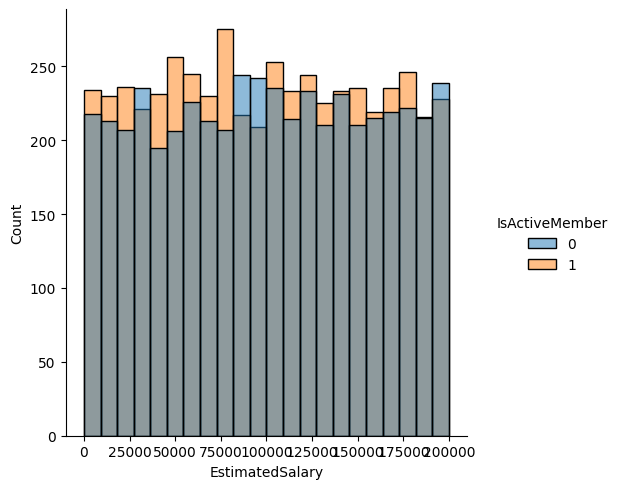

In [15]:
sns.displot(data,x='EstimatedSalary',hue='IsActiveMember')

In [16]:
geography=pd.get_dummies('Geography',drop_first=True)
data=pd.concat([data,geography],axis=1)
data=data.drop('Geography',axis=1)

In [17]:
gender=pd.get_dummies('Gender',drop_first=True)
data=pd.concat([data,gender],axis=1)
data=data.drop('Gender',axis=1)

Model Selection

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
data.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,0.00,1,1,1,101348.88,1
1,608,41,83807.86,1,0,1,112542.58,0
2,502,42,159660.80,3,1,0,113931.57,1
3,699,39,0.00,2,0,0,93826.63,0
4,850,43,125510.82,1,1,1,79084.10,0


In [20]:
X=data.drop('Exited',axis=1)
y=data['Exited']

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [23]:
X_scaled_train=sc.fit_transform(X_train)
X_scaled_test=sc.fit_transform(X_test)

Accuracy

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
from sklearn.svm import SVC
s=SVC()

In [26]:
s.fit(X_scaled_train,y_train)

SVC()

In [27]:
pred_s=s.predict(X_scaled_test)

In [28]:
print(classification_report(y_test,pred_s))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2006
           1       0.87      0.38      0.53       494

    accuracy                           0.87      2500
   macro avg       0.87      0.68      0.73      2500
weighted avg       0.87      0.87      0.84      2500

